<a href="https://colab.research.google.com/github/Leo-alves2/Analise_Acao_Petrobras/blob/main/Analise_Petrobras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalando pacote do Yahoo finance para pegar movimento da bolsa B3

# A opção --upgrade --no-cache-dir só serve no colab indicando que é para 
# instalar na cache da maquina

!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 236.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 235.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 236.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 261.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 233.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3


In [3]:
# Instalando pacotes ou libs

# Pacotes para analise

import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes para analise grafica

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Função para data

from datetime import datetime

# YFinance

import yfinance as yf
yf.pdr_override()

# Avisos

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Coletando os dados do Yahoo Finance

# Entre parantece colocamos o ticket que queremos analisar e o periodo

dados = web.get_data_yahoo('PETR4.SA', period= '1y')


In [7]:
# Ver o tamanho da base coletada

print('Quantidade de linhas e colunas na base coletada :',dados.shape)

Quantidade de linhas e colunas na base coletada : (252, 6)


In [8]:
# Ver os primeiros dados

dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729471,88013400
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285326,55687000
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981436,65689000
2022-02-16,32.830002,33.700001,32.770000,32.930000,19.244415,65811600


In [9]:
# Ver os últimos dados

dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100
2023-02-09,26.049999,26.320000,25.790001,25.930000,25.930000,38198300
2023-02-10,25.980000,26.790001,25.930000,26.719999,26.719999,54683100


In [10]:
# Verificar se tem dados nulos e somar

print('Quantidade de dados faltante :', dados.isna().sum().sum())

Quantidade de dados faltante : 0


In [12]:
# Verificando os tipo de dados

dados.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
# Verificando informação da base de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-10 to 2023-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [13]:
# Estatistica descritiva 

dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,29.936190,30.476587,29.394960,29.951944,23.394864,8.192431e+07
std,3.663650,3.681757,3.621338,3.648793,3.532175,3.683580e+07
min,21.000000,22.110001,20.770000,21.469999,17.537956,2.876520e+07
25%,26.995000,27.545000,26.167500,26.930000,20.008965,5.612075e+07
50%,30.750000,31.339999,30.205000,30.605000,23.325000,7.285520e+07
75%,32.717501,33.507500,32.382501,32.967500,26.070860,9.630120e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


# Média móvel

O que é a média móvel?
A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência. Neste indicador, são utilizadas médias de períodos diferentes, geralmente uma de curto prazo e outra de longo prazo. O termo “móvel” é porque os dados são renovados com frequência, isto é, são calculados com base nos valores mais recentes.

Os dois tipos mais populares de médias móveis são: Média Móvel Aritmética (MMA) e Média Móvel Exponencial (MME). Elas podem ser utilizadas para identificar a direção da tendência ou definir os níveis de suporte e resistência dos preços.

In [15]:
# Exemplo de média simples

lista = [11, 12, 13 ,15, 16, 17]

from statistics import mean as media

print(f'Media: {media(lista)}')

Media: 14


In [17]:
# Exemplo de média movel

n = 5

for intervalo in range(3):
  print(f'{intervalo}ª Dia {sum(lista[intervalo:n]) / 5}')

0ª Dia 13.4
1ª Dia 11.2
2ª Dia 8.8


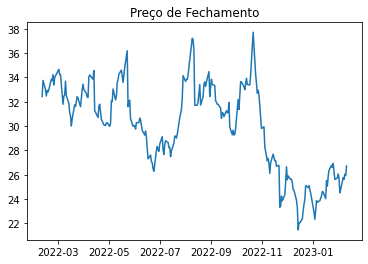

In [19]:
# Mostrando no grafico da coluna close

plt.plot(dados['Close'])
plt.title('Preço de Fechamento');

In [20]:
# Utilizando a função rolling para tirar a média movel, ela serve  para outras estatisticas

periodo = 5

dados['Close'].rolling(window=periodo).mean()

Date
2022-02-10          NaN
2022-02-11          NaN
2022-02-14          NaN
2022-02-15          NaN
2022-02-16    32.921999
                ...    
2023-02-06    25.374000
2023-02-07    25.284000
2023-02-08    25.352000
2023-02-09    25.634000
2023-02-10    26.020000
Name: Close, Length: 252, dtype: float64

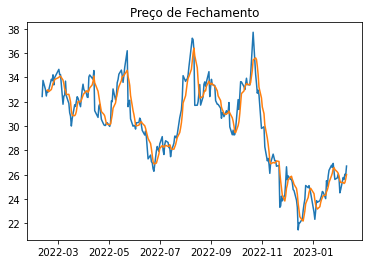

In [21]:
# Mostrando no grafico da coluna close
# Plotlib vai sobre por os grafico com a média movel

plt.plot(dados['Close'])
plt.plot(dados['Close'].rolling(window=periodo).mean())
plt.title('Preço de Fechamento');

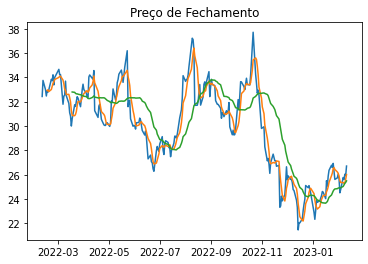

In [23]:
# Mostrando no grafico da coluna close
# Plotlib vai sobre por os grafico com a média movel
# Aumentando mais 20 dias no periodo

plt.plot(dados['Close'])
plt.plot(dados['Close'].rolling(window=periodo).mean())
plt.plot(dados['Close'].rolling(window=periodo + 20).mean())
plt.title('Preço de Fechamento');

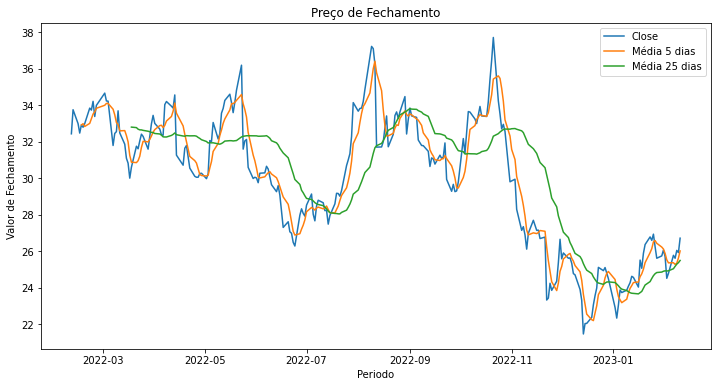

In [27]:
# Customizando o grafico

plt.figure( figsize=(12,6)) # tamanho da imagem
plt.plot(dados['Close'])
plt.plot(dados['Close'].rolling(window=periodo).mean())
plt.plot(dados['Close'].rolling(window=periodo + 20).mean())
plt.title('Preço de Fechamento')
plt.legend(['Close', 'Média 5 dias', 'Média 25 dias']) # A legenda tem que ser na sequencia do post
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

In [29]:
# Utilizando o Plotly para uma apresentação grafica mais interativa

# plotly.express(px) é a maneira mais rápida de apresentar um grafico

# plotly.graph_objets(go) é um grafico personalisado de alto nivel

# Vamos criar um nova coluna do DF e colocar a média movel

periodo = 5

dados['Media_movel'] = dados['Close'].rolling(window=periodo).mean()
dados.head()

,Open,High,Low,Close,Adj Close,Volume,Media_movel
Date,,,,,,,
2022-02-10,32.299999,32.900002,31.940001,32.439999,18.958057,49534600,NaN
2022-02-11,32.770000,33.910000,32.630001,33.759998,19.729471,88013400,NaN
2022-02-14,33.860001,33.939999,32.820000,33.000000,19.285326,55687000,NaN
2022-02-15,32.660000,32.680000,31.889999,32.480000,18.981436,65689000,NaN
2022-02-16,32.830002,33.700001,32.770000,32.930000,19.244415,65811600,32.921999


In [30]:
dados.tail()

,Open,High,Low,Close,Adj Close,Volume,Media_movel
Date,,,,,,,
2023-02-06,24.870001,25.870001,24.750000,25.780001,25.780001,82794500,25.374
2023-02-07,25.910000,26.139999,25.459999,25.620001,25.620001,55311800,25.284
2023-02-08,25.799999,26.150000,25.559999,26.049999,26.049999,48713100,25.352
2023-02-09,26.049999,26.320000,25.790001,25.930000,25.930000,38198300,25.634
2023-02-10,25.980000,26.790001,25.930000,26.719999,26.719999,54683100,26.020


In [31]:
# Construindo o grafico

figura = px.line(
    dados,
    y='Close',
    title='Fechamento'
)
figura.show()

In [34]:
figura_02 = go.Figure(
    data=go.Scatter(
        x=dados.index,
        y=dados['Close'],
        line=( dict(color='firebrick', width=3))
    )
)

figura_02.update_layout(
    title='Analise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)

figura_02.show()

# Grafico Candlestick Charts

Grafico estilo financeiro

In [36]:
grafico_candle = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close']
        )
    ]
)
grafico_candle.show()

In [38]:
# Personalisando o grafico

grafico_candle = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close']
        )
    ]
)

grafico_candle = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)
grafico_candle.update_layout(
    xaxis_rangeslider_visible=False,
    title='Analise de Fechamento',
    xaxis_title='Pediodo',
    yaxis_title='Valor de Fechamento'
)
grafico_candle.show()

# Criando relatório e exportando para PDF

In [47]:
# Criando a figura

figura = make_subplots(
    rows=2,
    cols=1,
    specs=[    
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação','Fechamento')

)

# Layout e Dimensão

figura.update_layout(
    width=1000,
    height=800,
    title_text='Advanced Analytics <br> Follow-up Petrobras'
)

figura.show()

In [49]:
# Adicionando os dados para o grafico na 1º posição

# Criando a figura

figura = make_subplots(
    rows=2,
    cols=1,
    specs=[    
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação','Fechamento')

)

# Layout e Dimensão

figura.update_layout(
    width=1000,
    height=800,
    title_text='Advanced Analytics <br> Follow-up Petrobras'
)

# Adicionando um grafico na 1º posição

figura.add_trace(
     go.Candlestick(
          x=dados.index,
          open=dados['Open'],
          high=dados['High'],
          low=dados['Low'],
          close=dados['Close']
      ),
      row=1, col=1
)

figura.update_layout(
    xaxis_rangeslider_visible=False
)

figura.show()

In [68]:
# Adicionando os dados para o grafico na 2ª posição

# Criando a figura

figura = make_subplots(
    rows=2,
    cols=1,
    specs=[    
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação','Fechamento')

)

# Layout e Dimensão

figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics </b> <br> Follow-up Petrobras'
)

# Adicionando um grafico na 1º posição

figura.add_trace(
     go.Candlestick(
          x=dados.index,
          open=dados['Open'],
          high=dados['High'],
          low=dados['Low'],
          close=dados['Close']
      ),
      row=1, col=1
)

figura.update_layout(
    xaxis_rangeslider_visible=False
)
# Adicionando um grafico na 2ª posição

figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Media_movel'],
        mode='lines',
        name='Média Movel',
        line=dict(color='red')
    ),
    row=2, col=1

)

figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict(size=10)
    )
)

figura.add_annotation(
    showarrow=False,
    text='Analise feita em Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

figura.add_annotation(
    showarrow=False,
    text='By @Leo_alves2',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

figura.show()